In [41]:
import os
import json
import numpy as np
from matplotlib import patches
import matplotlib.pyplot as plt
import pandas as pd


DATA_ROOT = "/Users/andrewgrowney/Data/kaggle/marchmadness-2023"
teams_df = pd.read_csv(f"{DATA_ROOT}/Stage2/MTeams.csv")


In [2]:
def get_team_name(team_id):
    return teams_df[teams_df['TeamID'] == team_id]['TeamName'].values[0]

Group teams by the Round

In [3]:
ROUND_DAYS = {
    1: { "Name": "Play In",          "DayNums": [134,135]},
    2: { "Name": "First Round",      "DayNums": [136,137]},
    3: { "Name": "Second Round",     "DayNums": [138,139]},
    4: { "Name": "Sweet Sixteen",    "DayNums": [143,144]},
    5: { "Name": "Elite Eight",      "DayNums": [145,146]},
    6: { "Name": "Final Four",       "DayNums": [152]},
    7: { "Name": "Championship",     "DayNums": [154]}
}
def get_round_by_name(round_name):
    for round_id, round in ROUND_DAYS.items():
        if round["Name"] == round_name:
            return round_id
    return None


In [4]:
TOURNEY_DF = pd.read_csv(f"{DATA_ROOT}/Stage2/MNCAATourneyCompactResults.csv")
teams_in_round = {}
for round_id, round in ROUND_DAYS.items():
    round_games = TOURNEY_DF.loc[TOURNEY_DF["DayNum"].isin(round["DayNums"])]

    teams_in_round[round_id] = {}
    for season, df in round_games.groupby("Season"):
        search_ids = ["WTeamID","LTeamID"]
        
        season_round = df[search_ids].values.flatten()
        teams_in_round[round_id][season] = season_round

print(teams_in_round)


{1: {2001: array([1322, 1457]), 2002: array([1373, 1108]), 2003: array([1421, 1411]), 2004: array([1197, 1250]), 2005: array([1324, 1105]), 2006: array([1284, 1214]), 2007: array([1310, 1197]), 2008: array([1291, 1164]), 2009: array([1287, 1106]), 2010: array([1115, 1457]), 2011: array([1155, 1412, 1421, 1114, 1427, 1106, 1433, 1425]), 2012: array([1140, 1233, 1443, 1290, 1378, 1143, 1436, 1249]), 2013: array([1299, 1251, 1388, 1292, 1241, 1254, 1247, 1129]), 2014: array([1107, 1291, 1301, 1462, 1142, 1411, 1397, 1234]), 2015: array([1214, 1264, 1279, 1140, 1173, 1129, 1352, 1316]), 2016: array([1195, 1192, 1455, 1435, 1221, 1380, 1276, 1409]), 2017: array([1243, 1448, 1291, 1309, 1413, 1300, 1425, 1344]), 2018: array([1347, 1254, 1382, 1417, 1393, 1113, 1411, 1300]), 2019: array([1125, 1396, 1192, 1341, 1113, 1385, 1295, 1300]), 2021: array([1179, 1455, 1313, 1111, 1411, 1291, 1417, 1277]), 2022: array([1231, 1461, 1411, 1394, 1323, 1353, 1460, 1136])}, 2: {1985: array([1116, 1234, 11

In [5]:
championship_team_seasons = []
for season, teams in teams_in_round[get_round_by_name("Championship")].items():
    print(f"{season}: {[get_team_name(t) for t in teams]}")
    championship_team_seasons.extend([(t,season) for t in teams])
    

1985: ['Villanova', 'Georgetown']
1986: ['Louisville', 'Duke']
1987: ['Indiana', 'Syracuse']
1988: ['Kansas', 'Oklahoma']
1989: ['Michigan', 'Seton Hall']
1990: ['UNLV', 'Duke']
1991: ['Duke', 'Kansas']
1992: ['Duke', 'Michigan']
1993: ['North Carolina', 'Michigan']
1994: ['Arkansas', 'Duke']
1995: ['UCLA', 'Arkansas']
1996: ['Kentucky', 'Syracuse']
1997: ['Arizona', 'Kentucky']
1998: ['Kentucky', 'Utah']
1999: ['Connecticut', 'Duke']
2000: ['Michigan St', 'Florida']
2001: ['Duke', 'Arizona']
2002: ['Maryland', 'Indiana']
2003: ['Syracuse', 'Kansas']
2004: ['Connecticut', 'Georgia Tech']
2005: ['North Carolina', 'Illinois']
2006: ['Florida', 'UCLA']
2007: ['Florida', 'Ohio St']
2008: ['Kansas', 'Memphis']
2009: ['North Carolina', 'Michigan St']
2010: ['Duke', 'Butler']
2011: ['Connecticut', 'Butler']
2012: ['Kentucky', 'Kansas']
2013: ['Louisville', 'Michigan']
2014: ['Connecticut', 'Kentucky']
2015: ['Duke', 'Wisconsin']
2016: ['Villanova', 'North Carolina']
2017: ['North Carolina', '

In [9]:
from mm_analytics.objects import get_team_seasons
REGULAR_SEASON_DF = pd.read_csv(f"{DATA_ROOT}/Stage2/MRegularSeasonDetailedResults.csv")
SEEDS_DF = pd.read_csv(f"{DATA_ROOT}/Stage2/MNCAATourneySeeds.csv")
teams_2022 = get_team_seasons(2022, REGULAR_SEASON_DF[REGULAR_SEASON_DF["Season"] == 2022], SEEDS_DF, pd.read_csv(f"{DATA_ROOT}/Stage2/MTeamConferences.csv"), pd.read_csv(f"{DATA_ROOT}/Stage2/MTeamCoaches.csv"))

Team: 1101, Seed: None, Year: 2022
Team: 1102, Seed: None, Year: 2022
Team: 1103, Seed: 13, Year: 2022
Team: 1104, Seed: 6, Year: 2022
Team: 1105, Seed: None, Year: 2022
Team: 1106, Seed: None, Year: 2022
Team: 1107, Seed: None, Year: 2022
Team: 1108, Seed: None, Year: 2022
Team: 1110, Seed: None, Year: 2022
Team: 1111, Seed: None, Year: 2022
Team: 1112, Seed: 1, Year: 2022
Team: 1113, Seed: None, Year: 2022
Team: 1114, Seed: None, Year: 2022
Team: 1115, Seed: None, Year: 2022
Team: 1116, Seed: 4, Year: 2022
Team: 1117, Seed: None, Year: 2022
Team: 1119, Seed: None, Year: 2022
Team: 1120, Seed: 2, Year: 2022
Team: 1122, Seed: None, Year: 2022
Team: 1123, Seed: None, Year: 2022
Team: 1124, Seed: 1, Year: 2022
Team: 1125, Seed: None, Year: 2022
Team: 1126, Seed: None, Year: 2022
Team: 1127, Seed: None, Year: 2022
Team: 1129, Seed: 8, Year: 2022
Team: 1130, Seed: None, Year: 2022
Team: 1131, Seed: None, Year: 2022
Team: 1132, Seed: None, Year: 2022
Team: 1133, Seed: None, Year: 2022
Team:

/Users/andrewgrowney/.pyenv/versions/3.9.10/envs/nlu/lib/python3.9/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/andrewgrowney/.pyenv/versions/3.9.10/envs/nlu/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [24]:
df_2022 = pd.DataFrame(columns = ["TeamID"] + teams_2022[1242].get_data_columns())
for team_id, team in teams_2022.items():
    team_row = np.array([team_id] + team.get_data().tolist())
    df_2022 = pd.concat([df_2022, pd.DataFrame([team_row], columns = df_2022.columns)], ignore_index=True)
    

/var/folders/7y/1jp5fzbs05q03xszr7zmwvqw0000gn/T/ipykernel_94616/4166626553.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


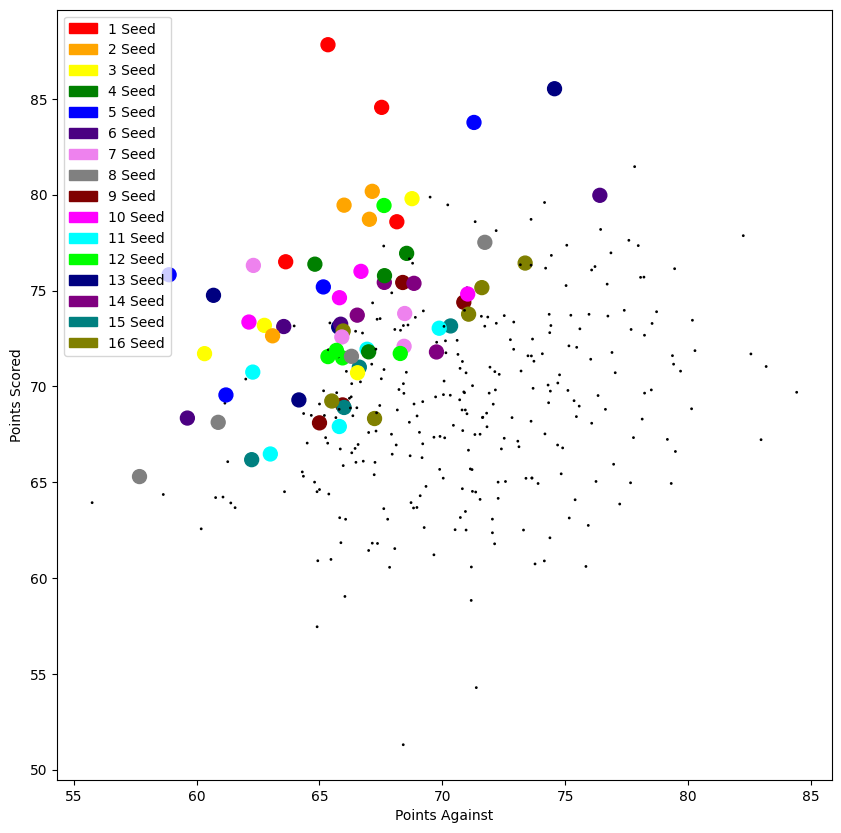

In [67]:
seed_colors = ["#FF0000", "#FFA500", "#FFFF00", "#008000", "#0000FF", "#4B0082", "#EE82EE", "#808080", "#800000", "#FF00FF", "#00FFFF", "#00FF00", "#000080", "#800080", "#008080", "#808000"]
assert len(seed_colors) == 16
plot_colors = [(seed_colors[int(s)-1], 10) if isinstance(s, float) and not np.isnan(s) else ("#000000", 0.1) for s in df_2022["Seed"]]

plot_x, plot_y = df_2022["OppPoints_mean"], df_2022["Points_mean"]

fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(plot_x, plot_y, c=[c[0] for c in plot_colors], s = [c[1]*10 for c in plot_colors])
ax.legend([patches.Circle((0, 0), 0.1, color = c) for c in seed_colors],[f"{s} Seed" for s in range(1, 17)], loc="upper left")
ax.set_xlabel("Points Against")
ax.set_ylabel("Points Scored")
fig.show()

[(1103, 2), (1104, 2), (1112, 4), (1116, 5), (1120, 3), (1124, 3), (1129, 2), (1151, 2), (1159, 2), (1161, 2), (1163, 2), (1166, 3), (1168, 2), (1172, 2), (1174, 2), (1181, 6), (1209, 2), (1211, 4), (1222, 5), (1228, 3), (1231, 2), (1234, 2), (1235, 4), (1240, 2), (1242, 7), (1246, 2), (1255, 2), (1260, 2), (1261, 2), (1266, 2), (1272, 3), (1274, 5), (1276, 4), (1277, 3), (1286, 2), (1293, 3), (1308, 3), (1313, 2), (1314, 7), (1323, 3), (1326, 3), (1344, 4), (1345, 4), (1350, 3), (1355, 2), (1361, 2), (1362, 2), (1371, 2), (1388, 3), (1389, 5), (1395, 3), (1397, 3), (1400, 3), (1403, 4), (1411, 2), (1412, 2), (1417, 4), (1425, 2), (1436, 2), (1437, 6), (1439, 2), (1458, 3), (1460, 2), (1463, 2)]


/var/folders/7y/1jp5fzbs05q03xszr7zmwvqw0000gn/T/ipykernel_94616/3041456271.py:23: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


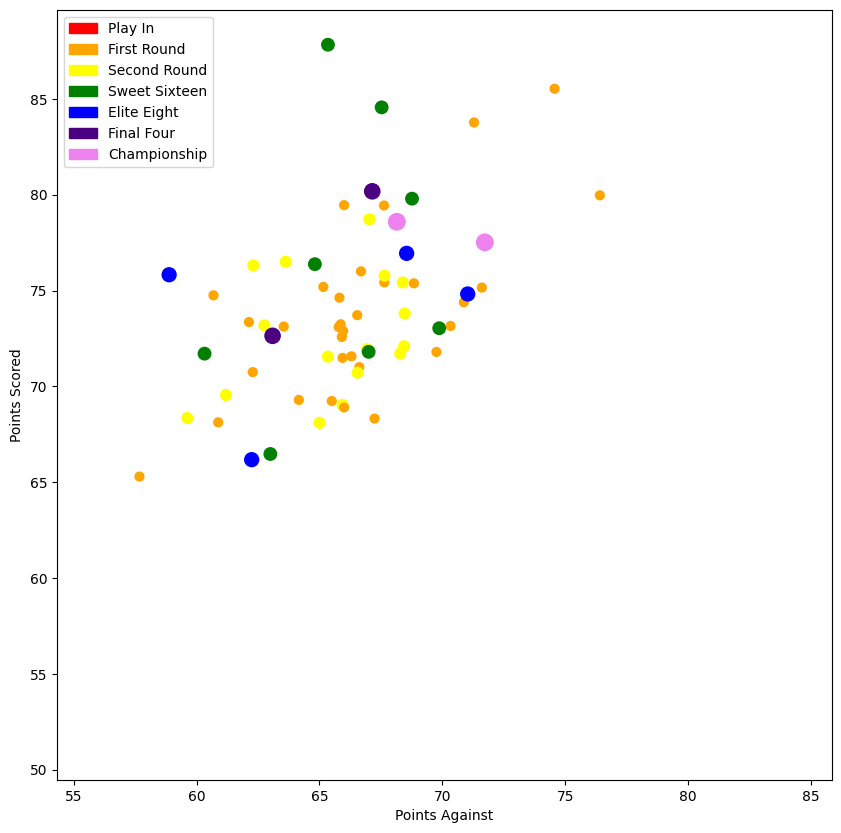

In [80]:
"""Make a scatter plot with the points scored and points allowed for each team in the 2022 season
    - color the points by round each team advanced to
"""
plot_x, plot_y = df_2022["OppPoints_mean"], df_2022["Points_mean"]

team_rounds = {}
for team_id, team in teams_2022.items():
    team_eliminated_in = 0
    for round_id, round_teams in teams_in_round.items():
        if round_id == 1: # Skip the play in round
            continue
        if team_id not in round_teams[2022]:
            break
        team_eliminated_in = round_id
    team_rounds[team_id] = team_eliminated_in

print([(t,v) for (t,v) in team_rounds.items() if v != 0 ])
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(plot_x, plot_y, c=[seed_colors[team_rounds[team_id] - 1] for team_id in df_2022["TeamID"]], s = [20*team_rounds[team_id] for team_id in df_2022["TeamID"]])
ax.legend([patches.Circle((0, 0), 0.1, color = seed_colors[round_id-1]) for round_id in range(1, 8)],[f"{ROUND_DAYS[round_id]['Name']}" for round_id in range(1, 8)], loc="upper left")
ax.set_xlabel("Points Against")
ax.set_ylabel("Points Scored")
fig.show()